<div class="alert alert-info">
    
# Исследование гипотез и проведение А/В- тестов 

<div style="border:solid green 2px; padding: 20px">
<b>Постановка задачи</b>
    
    В рамкахм проекта необходимо изучить приоритизировать выдвинутые гипотезы для увеличения выручки компании. 
    После чего провести А/В тесты и проанализировать их результат, после чего принять решение о резултате проведения теста и дальнейщих действиях

<div style="border:solid green 2px; padding: 20px">
<b>Описание входных данных</b>
    
Файл /datasets/hypothesis.csv    
- Hypothesis — краткое описание гипотезы;  
- Reach — охват пользователей по 10-балльной шкале;  
- Impact — влияние на пользователей по 10-балльной шкале;  
- Confidence — уверенность в гипотезе по 10-балльной шкале;  
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

    
Файл /datasets/orders.csv  
- transactionId — идентификатор заказа;  
- visitorId — идентификатор пользователя, совершившего заказ;  
-date — дата, когда был совершён заказ;  
- revenue — выручка заказа;  
- group — группа A/B-теста, в которую попал заказ.  
    
Файл /datasets/visitors.csv  
- date — дата;  
- group — группа A/B-теста;  
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста  
    

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    visitors = pd.read_csv('visitors.csv')
    orders = pd.read_csv('orders.csv')
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
def get_info(df):
    df.info()
    display(df.head())
    display(df.isna().sum())

In [4]:
get_info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


date        0
group       0
visitors    0
dtype: int64

In [5]:
get_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [6]:
get_info(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
def dublicate_check(df):
    dublicate_count = df.duplicated().sum()
    if dublicate_count > 0:
        print('в датафрейме найдены дубли:', dublicate_count)
    else:
        print('дублей не обнаружено')
    

In [11]:
dublicate_check(hypothesis)

дублей не обнаружено


In [12]:
dublicate_check(visitors)

дублей не обнаружено


In [13]:
dublicate_check(orders)

дублей не обнаружено


In [14]:
print('Группы в датафрейме visitors', visitors['group'].unique())

Группы в датафрейме visitors ['A' 'B']


In [15]:
print('Группы в датафрейме orders', orders['group'].unique())

Группы в датафрейме orders ['B' 'A']


In [16]:
print('Минимальная дата в датафрейме visitors', visitors['date'].min())
print('Максимальная дата в датафрейме visitors', visitors['date'].max())

Минимальная дата в датафрейме visitors 2019-08-01 00:00:00
Максимальная дата в датафрейме visitors 2019-08-31 00:00:00


In [17]:
print('Минимальная дата в датафрейме orders', orders['date'].min())
print('Максимальная дата в датафрейме orders', orders['date'].max())

Минимальная дата в датафрейме orders 2019-08-01 00:00:00
Максимальная дата в датафрейме orders 2019-08-31 00:00:00


<div class="alert alert-info">

## Приоритизация гипотез

<div class="alert alert-info">

### Приоритизация гипотез методом ICE

In [18]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']])
pd.options.display.max_colwidth = 100


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


🧑‍🎓 Ира: наиболее перспективные гипотезы о скидке на товары в дни рождения, новых каналах привлечения пользователей и доп. форме подписки

<div class="alert alert-info">

### Приоритизация гипотез методом RICE

In [19]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']])

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


🧑‍🎓 Ира: наиболее перспективные оказались все так же гипотезы о новых каналах привлечения пользователей и доп. форме подписки, но вместо гипотезы об акции на день рождения в тройке лидеров гипотеза и добавлении блоков на сайт интернет-магазина.

<div class="alert alert-info">

### Вывод

In [20]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


🧑‍🎓 Ира: наиболее перспективные гипотезы при приоритизации методом ICE оказались гипотезы 8, 0 и 7, в то время как приоритизация методом RICE показала тройку лидеров 7, 2 и 0.  

Это может быть связанно с тем, что:  
- у гипотезы 7 самый высокий показатель reach;
- гипотеза 8 пропала из тройки лидеров при приоритизации методом RICE, так как ее параметр reach самый низкий;
- у гипотезы 2 второй самый высокий показатель reach и при этом efforts ниже, чем у г потезы 8.  

Получается, что протестировать гипотезу 8 обойдется дороже, чем гипотезу 2, но при этом она практически не охватит пользователей.  
Гипотезу 7 протестировать так же дорого, как и гипотезу 8, но при этом она охватывает всех пользователей сайта.  
Гипотеза 0 хоть и не охватывает даже половины пользователей, ее влияние на них выше, чем у всех остальных гипотез, к тому же протестировать ее не сильно дороже гипотезы 7

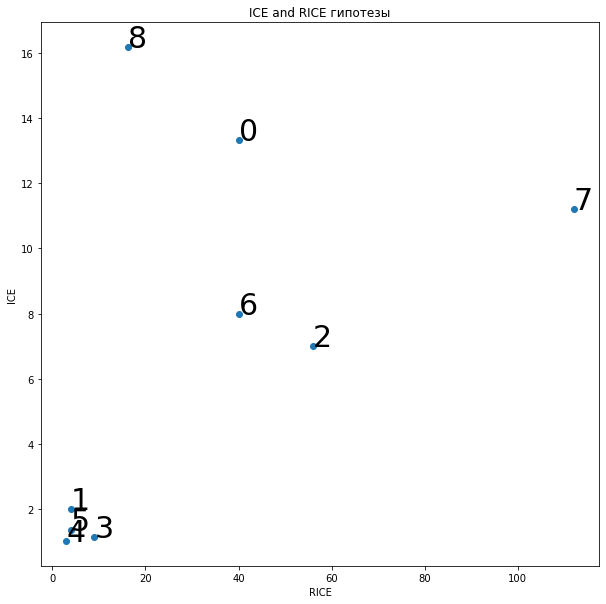

In [21]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()  

<div class="alert alert-info">

## Анализ A/B-теста

In [22]:
datesGroups = orders[['date','group']].drop_duplicates() 


In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

In [25]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [26]:
print('Минимальная дата в датафрейме orders', orders['date'].min())
print('Максимальная дата в датафрейме orders', orders['date'].max())

Минимальная дата в датафрейме orders 2019-08-01 00:00:00
Максимальная дата в датафрейме orders 2019-08-31 00:00:00


<div class="alert alert-info">

### Построение графиков кумулятивной выручки по группам

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]


In [28]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

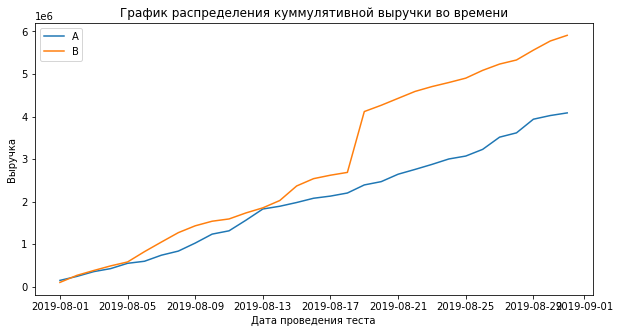

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График распределения куммулятивной выручки во времени')
plt.xlabel('Дата проведения теста')
plt.ylabel('Выручка')
plt.show()

🧑‍🎓 Ира: выручка по обеим группам растет во времени, группа В практически на всем графике опережает группу А, но у группы В есть резкий скачек, который может быть обусловлен выбросами.

<div class="alert alert-info">

### Построение графиков кумулятивного среднего чека по группам

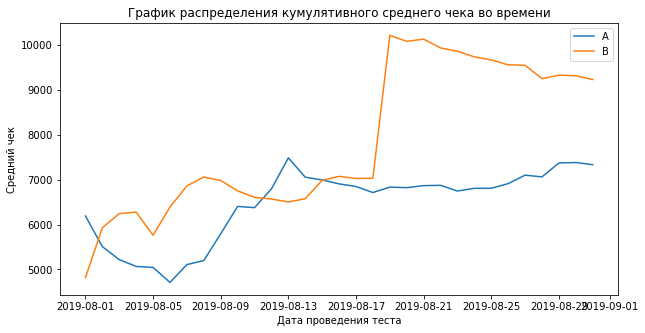

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('График распределения кумулятивного среднего чека во времени')
plt.xlabel('Дата проведения теста')
plt.ylabel('Средний чек')
plt.show()


🧑‍🎓 Ира: средний чек так же растет с течением времени, есть резкие скачки и падения на кривых обеих групп.  
Практически на всем графике снова лидирует группа В

<div class="alert alert-info">

### Построение графиков относительного изменения кумулятивного среднего чека группы B к группе A

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)


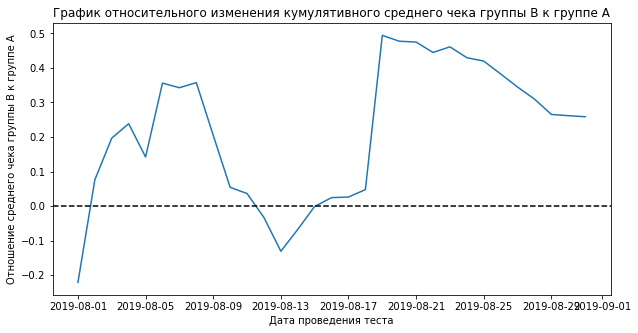

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(
    mergedCumulativeRevenue['date'], (
        mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']
    ) / (
        mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']
    )-1
)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата проведения теста')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.show()

🧑‍🎓 Ира: результаты меняются слишком резко несколько раз, возможно дело в аномально крупных заказах

<div class="alert alert-info">

### Построение графиков кумулятивной конверсии по группам

In [33]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [34]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [35]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

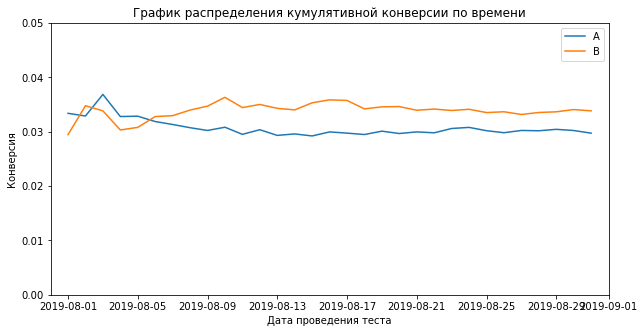

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.05])
plt.legend()
plt.title('График распределения кумулятивной конверсии по времени')
plt.xlabel('Дата проведения теста')
plt.ylabel('Конверсия')
plt.show()

🧑‍🎓 Ира: в начале конверсия групп колебалась, но затем группа В явно начинает лидировать, ее конверсия растет и со временем фиксируется на одном уровне, в то время как конверсия группы А упала ниже группы В, но со временем все равно продолжает испытывать легкие колебания

<div class="alert alert-info">

### Построение графиков относительного изменения кумулятивной конверсии группы B к группе A

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)


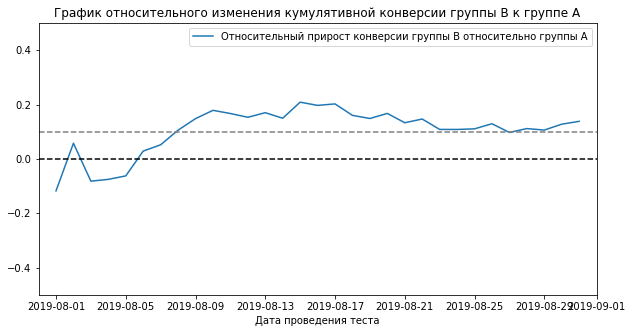

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1,
    label="Относительный прирост конверсии группы B относительно группы A"
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.legend() 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата проведения теста')
plt.show()

🧑‍🎓 Ира: конверсия группы В лидирует практически с самого начала, с течением времени она стабильно держится выше 10% относительно конверсии группы А

<div class="alert alert-info">

### Построение графиков количества заказов по пользователям

In [39]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


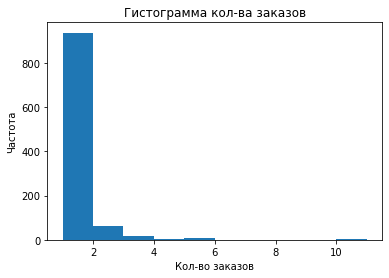

In [40]:
plt.hist(ordersByUsers['orders']) 
plt.title('Гистограмма кол-ва заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Частота')
plt.show()

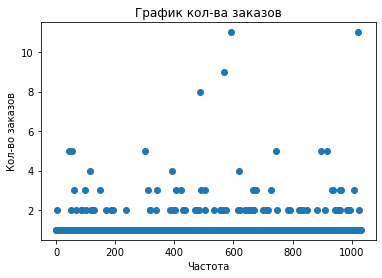

In [41]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График кол-ва заказов')
plt.xlabel('Частота')
plt.ylabel('Кол-во заказов')
plt.show()

🧑‍🎓 Ира: в основном клиенты совершают 1-2 заказа

<div class="alert alert-info">

### 95-й и 99-й перцентили количества заказов на пользователя

In [42]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


<div class="alert alert-info">

### Построение графиков стоимостей заказов

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


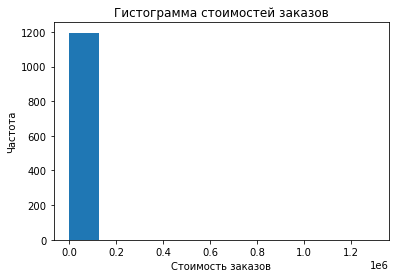

In [43]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

plt.hist(orders['revenue']) 
plt.title('Гистограмма стоимостей заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота')
plt.show()

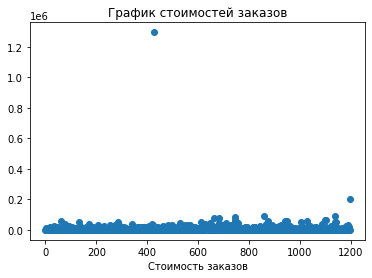

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.xlabel('Стоимость заказов')
plt.show()

<div class="alert alert-info">

### 95-й и 99-й перцентили стоимости заказов

In [45]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


🧑‍🎓 Ира: соответственно у нас меньше 1% клиентов делали заказы на сумму свыше 58тыс.

<div class="alert alert-info">

### Статистическая значимость различий в конверсии между группами по «сырым» данным

🧑‍🎓 Ира: Сформулируем гипотезу:  
        Нулевая гипотеза: различий в конверсии между группами нет.  
        Альтернативная: различия в конверсии между группами есть.

In [46]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [47]:
visitorsACummulative = cumulativeData[cumulativeData['group'] == 'A'][['date', 'visitors']].reset_index(drop=True)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [48]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [49]:
visitorsBCummulative = cumulativeData[cumulativeData['group'] == 'B'][['date', 'visitors']].reset_index(drop=True)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
0,2019-08-01,713
1,2019-08-02,1294
2,2019-08-03,1803
3,2019-08-04,2573
4,2019-08-05,3280


In [50]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [51]:
ordersACummulative = cumulativeData[
    cumulativeData['group'] == 'A'][['date', 'orders', 'revenue']
                                                                   ].reset_index(drop=True)

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [52]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()


,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [53]:
ordersBCummulative = cumulativeData[
    cumulativeData['group'] == 'B'][['date', 'orders', 'revenue']
                                                                   ].reset_index(drop=True)


ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [54]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [55]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

In [56]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersB.columns = ['visitorId', 'orders'] 


In [57]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders'
    )],axis=0
)
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [58]:
sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders'
    )],axis=0
) 


In [59]:
avg_conv = stats.mannwhitneyu(sampleA, sampleB)[1]

print('{0:.3f}'.format(avg_conv))

if avg_conv > 0.05:
    print('Нулевая гипотеза не отвергается')
else:
    print('Отвергаем нулевую гипотезу')

0.017
Отвергаем нулевую гипотезу


In [60]:
print('Прирост конверсии группы В относительно группы А = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Прирост конверсии группы В относительно группы А = 0.138


🧑‍🎓 Ира: Различия между группами есть, так же виден прирост конверсии группы В относительно группы А на 14%

<div class="alert alert-info">

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

🧑‍🎓 Ира:  
    Нулевая гипотеза: различий в среднем чеке между группами нет.  
    Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [61]:
avg_bil = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('{0:.3f}'.format(avg_bil))

if avg_bil > 0.05:
    print('Нулевая гипотеза не отвергается')
else:
    print('Отвергаем нулевую гипотезу')


0.729
Нулевая гипотеза не отвергается


In [62]:
div_bil = orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1


if div_bil > 0:
    print('Средний чек группы В выше среднего чека группы А на {0:.1%}'.format(div_bil))
else:
    print('Средний чек группы В ниже среднего чека группы А на {0:.1%}'.format(div_bil))


Средний чек группы В выше среднего чека группы А на 25.9%


🧑‍🎓 Ира: гипотеза о равенстве средних чеков не отвергается, но при этом мы видим разницу между чеками в 26%, возможно дело в аномальных заказах

<div class="alert alert-info">

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

<div class="alert alert-info">

#### Очистим данные от аномальных значений

🧑‍🎓 Ира: Примем за аномальных клиентов тех, кто совершал более 3 заказов или заказы на сумму свыше 30тыс

In [63]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(
            ordersByUsers['orders'], [95, 99]
        )[0]
                      ]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(
            ordersByUsers['orders'], [95, 99]
        )[0]
                      ]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(
    orders['revenue'], [95, 99]
)[0]
                                 ]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.shape[0])
abnormalUsers.head()

74

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [64]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [65]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<div class="alert alert-info">

#### Посчитаем статистическую значимость

In [66]:
filtered_avg_conv = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('{0:.3f}'.format(filtered_avg_conv))

if filtered_avg_conv > 0.05:
    print('Нулевая гипотеза не отвергается')
else:
    print('Отвергаем нулевую гипотезу')


0.013
Отвергаем нулевую гипотезу


In [67]:
print('Прирост конверсии группы В относительно группы А по очищенным данным = {0:.3f}'.format(
    sampleBFiltered.mean() / sampleAFiltered.mean() - 1)
     )

Прирост конверсии группы В относительно группы А по очищенным данным = 0.173


<div class="alert alert-info">

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [68]:
filtered_avg_bil = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print('{0:.3f}'.format(filtered_avg_bil))

if filtered_avg_bil > 0.05:
    print('Нулевая гипотеза не отвергается')
else:
    print('Отвергаем нулевую гипотезу')


0.738
Нулевая гипотеза не отвергается


In [69]:
filtered_div_bil = ( orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1 )

if filtered_div_bil > 0:
    print('Средний чек группы В выше среднего чека группы А на {0:.1%}'.format(filtered_div_bil))
else:
    print('Средний чек группы В ниже среднего чека группы А на {0:.1%}'.format(filtered_div_bil))


Средний чек группы В ниже среднего чека группы А на -2.0%


<div class="alert alert-info">

## Общий вывод

In [70]:
print('p-value конверсии по сырым данным {0:.3f}'.format(avg_conv))
print('p-value конверсии по очищенным данным {0:.3f}'.format(filtered_avg_conv))
print()

print('Прирост конверсии группы В относительно группы А по сырым данным = {0:.3f}'.format(
    sampleB.mean() / sampleA.mean() - 1)
     )

print('Прирост конверсии группы В относительно группы А по очищенным данным = {0:.3f}'.format(
    sampleBFiltered.mean() / sampleAFiltered.mean() - 1)
     )
print()

print('p-value среднего чека по сырым данным {0:.3f}'.format(avg_bil))
print('p-value среднего чека по очищенным данным {0:.3f}'.format(filtered_avg_bil))
print()

print('Отношение среднего чека группы В к среднему чеку группы А по сырым данным {0:.1%}'.format(div_bil))
print('Отношение среднего чека группы В к среднему чеку группы А по очищенным данным {0:.1%}'.format(filtered_div_bil))

p-value конверсии по сырым данным 0.017
p-value конверсии по очищенным данным 0.013

Прирост конверсии группы В относительно группы А по сырым данным = 0.138
Прирост конверсии группы В относительно группы А по очищенным данным = 0.173

p-value среднего чека по сырым данным 0.729
p-value среднего чека по очищенным данным 0.738

Отношение среднего чека группы В к среднему чеку группы А по сырым данным 25.9%
Отношение среднего чека группы В к среднему чеку группы А по очищенным данным -2.0%


<div style="border:solid green 2px; padding: 20px">
    
- статистической значимости в различии конверсий между группами нет ни по сырым ни по очищенным данным
- прирост конверсии после очистки данных практически не изменился
- есть статистическая значимость в различии по среднему чеку как по сырым, так и по очищенным данным, но после удаления аномалий прирост группы В резко сменился проседанием
    

    Явный прирост в конверсии виден и на графиках, и по цифрам.
    Проседание среднего чека на 2% у группы В может говорить нам об аномально крупном заказе. При этом график относительного прироста среднего чека так же говорит нам о том, что чек практически всегда выше у группы В. 
    Мои рекомендаци: Остановить тест и признать его успешным